# Flight fare prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os 
os.chdir('C:\\Data\\flightfarepredictor')

In [3]:
pwd

'C:\\Data\\flightfarepredictor'

## Importing the dataset

In [4]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace = True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.shape

(10682, 11)

## Data visualization and transformation

In [12]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

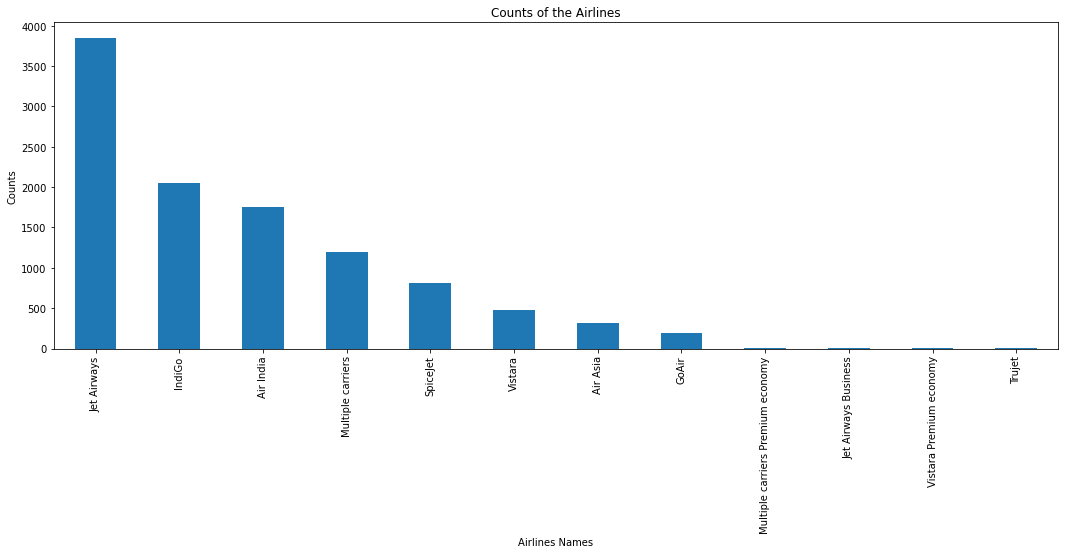

In [14]:
train_data['Airline'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Airlines Names')
plt.ylabel('Counts')
plt.title('Counts of the Airlines')
plt.show()

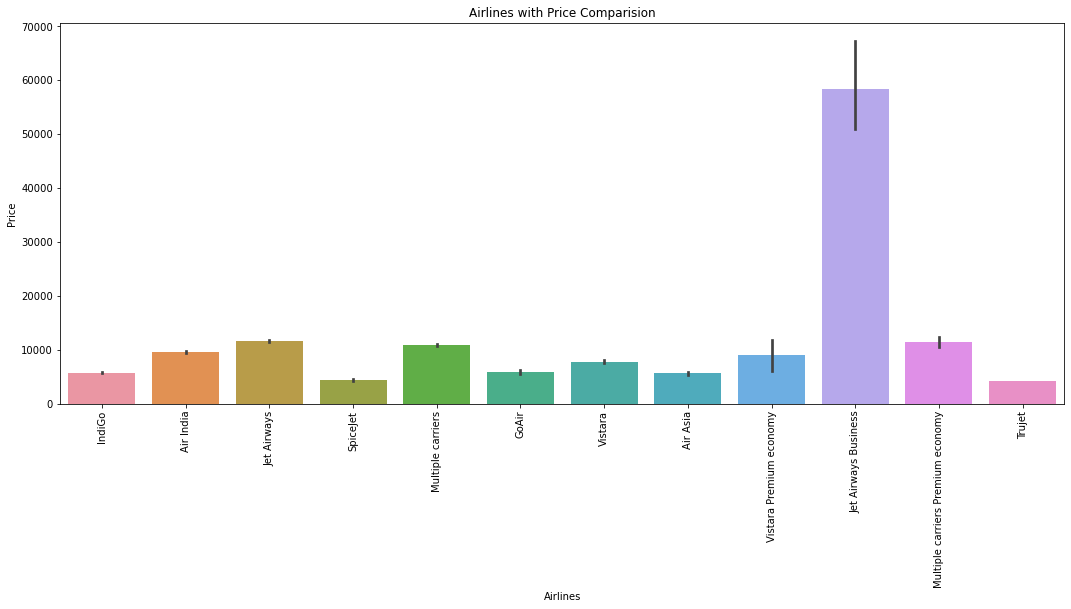

In [15]:
plt.figure(figsize=(18,7))
sns.barplot(x='Airline',y='Price',data=train_data)
plt.title('Airlines with Price Comparision')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Here we can see the price of the Jet airways bussiness is very high.

In [16]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

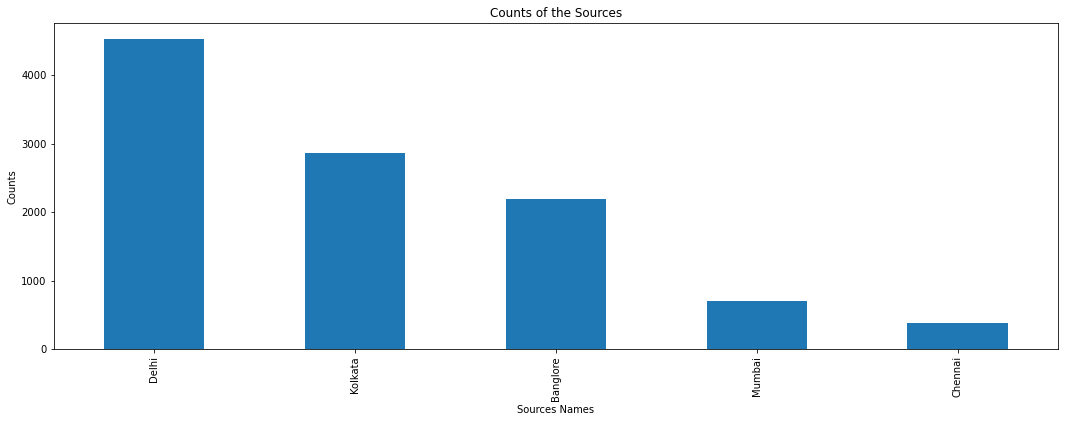

In [17]:
train_data['Source'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Sources Names')
plt.ylabel('Counts')
plt.title('Counts of the Sources')
plt.show()

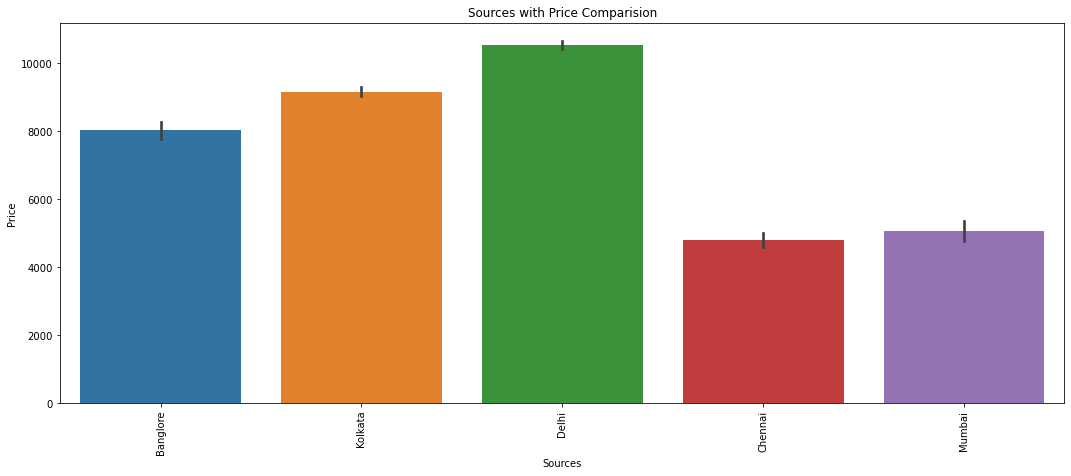

In [18]:
plt.figure(figsize=(18,7))
sns.barplot(x='Source',y='Price',data=train_data)
plt.title('Sources with Price Comparision')
plt.xlabel('Sources')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Here we can see the fare for delhi is very high

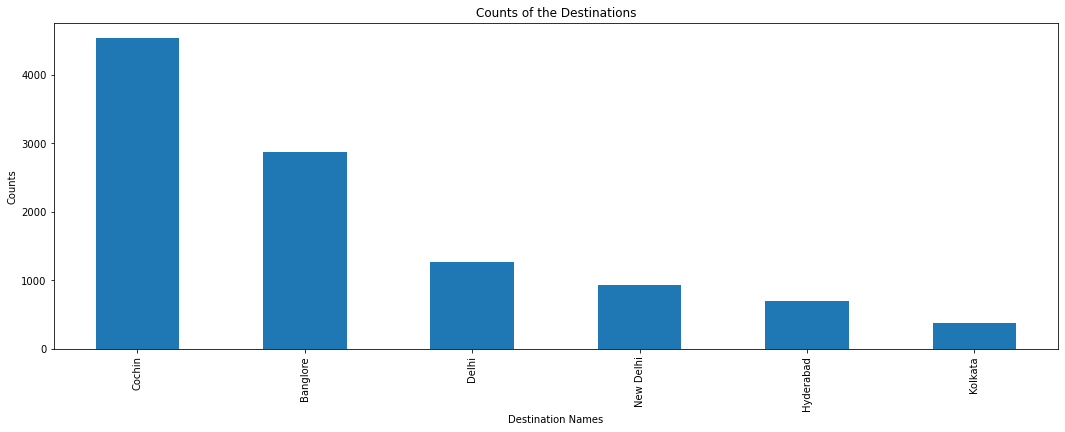

In [19]:
train_data['Destination'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(18,6))
plt.xlabel('Destination Names')
plt.ylabel('Counts')
plt.title('Counts of the Destinations')
plt.show()

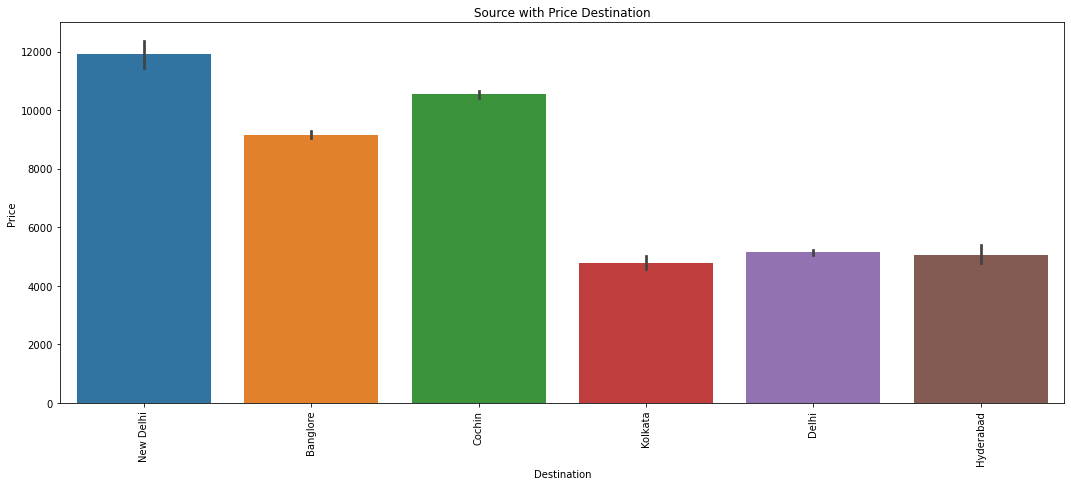

In [20]:
plt.figure(figsize=(18,7))
sns.barplot(x=train_data['Destination'],y=train_data['Price'].sort_values(ascending=True),data=train_data)
plt.title('Source with Price Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [21]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## converting Date features which are coming as object type into date-time stamp and extracting information from date feature

In [22]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [23]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [24]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [25]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [26]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [28]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [30]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

In [32]:
step=train_data['Duration'].str.replace('h',' ')
step=step.str.replace('m','')
step=step.str.split(expand=True) 
step.fillna(00,inplace=True)
train_data['Duration_Hours'] = step[0]
train_data['Duration_min'] = step[1]

In [33]:
train_data.drop(columns=['Duration'],inplace=True)

In [35]:
train_data['Duration_Hours']=train_data['Duration_Hours'].astype('int')
train_data['Duration_min']=train_data['Duration_min'].astype('int')


In [36]:
train_data.dtypes


Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Dep_hour            int64
Dep_min             int64
Arrival_hour        int64
Arrival_min         int64
Duration_Hours      int32
Duration_min        int32
dtype: object

## Handling Categorical Data


In [38]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [39]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [40]:
train_data['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [41]:
train_data['Total_Stops'].value_counts() #This is an ordinal categorical data.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

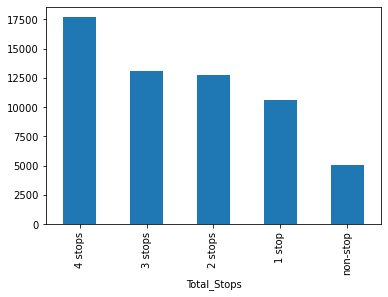

In [42]:
train_data.groupby('Total_Stops').mean()['Price'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [44]:
dictionary = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
train_data['Total_Stops'] = train_data['Total_Stops'].map(dictionary)

In [45]:
len(train_data['Additional_Info'][train_data['Additional_Info']=='No info'])/len(train_data.index)*100

#Since the data is 80% of data avalible in the form of No_info we are going to drop that columns

78.1127129750983

In [47]:
#  Route and Total_Stops are related to each other we are droping route

In [48]:
train_data.drop(columns=['Route','Additional_Info'],inplace=True)



In [49]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_Hours', 'Duration_min'],
      dtype='object')

In [50]:
def dummies(x,df):
    temp=pd.get_dummies(df[x],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop([x],axis=1,inplace=True)
    return df

In [51]:
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [52]:
train_data = dummies('Airline',train_data)
train_data = dummies('Source',train_data)
train_data = dummies('Destination',train_data)



In [53]:
train_data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Test Dataset

In [54]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [55]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [56]:
test_data.shape

(2671, 10)

In [57]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [58]:
# Repeating all the steps done for trainig set on the test set

In [59]:
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data['Departure_day'] = test_data['Date_of_Journey'].dt.day
test_data['Departure_months'] = test_data['Date_of_Journey'].dt.month
test_data['Dep_Time']=pd.to_datetime(test_data['Dep_Time'])
test_data['Dep_Hours'] = test_data['Dep_Time'].dt.hour
test_data['Dep_Min'] = test_data['Dep_Time'].dt.minute

In [60]:
test_data['Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'])
test_data['Arrival_Hours'] = test_data['Arrival_Time'].dt.hour
test_data['Arrival_min'] = test_data['Arrival_Time'].dt.minute
test_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time'],inplace=True)

In [61]:
step=test_data['Duration'].str.replace('h',' ')
step=step.str.replace('m','')
step=step.str.split(expand=True)
step.fillna(00,inplace=True)
test_data['Duration_Hours'] = step[0]
test_data['Duration_min'] = step[1]
test_data.drop(columns=['Duration'],inplace=True)
test_data['Duration_Hours']=test_data['Duration_Hours'].astype('int')
test_data['Duration_min']=test_data['Duration_min'].astype('int')
test_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Departure_day        int64
Departure_months     int64
Dep_Hours            int64
Dep_Min              int64
Arrival_Hours        int64
Arrival_min          int64
Duration_Hours       int32
Duration_min         int32
dtype: object

In [62]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [63]:
dictionary = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
test_data['Total_Stops'] = test_data['Total_Stops'].map(dictionary)

In [64]:
test_data.drop(columns=['Route','Additional_Info'],inplace=True)

In [65]:
test_data = dummies('Airline',test_data)
test_data = dummies('Source',test_data)
test_data = dummies('Destination',test_data)


In [66]:
test_data.head()

,Total_Stops,Departure_day,Departure_months,Dep_Hours,Dep_Min,Arrival_Hours,Arrival_min,Duration_Hours,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,5,12,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [67]:
train_data.shape

(10682, 30)

In [68]:
x = train_data.drop(columns=['Price'])
y = train_data['Price']

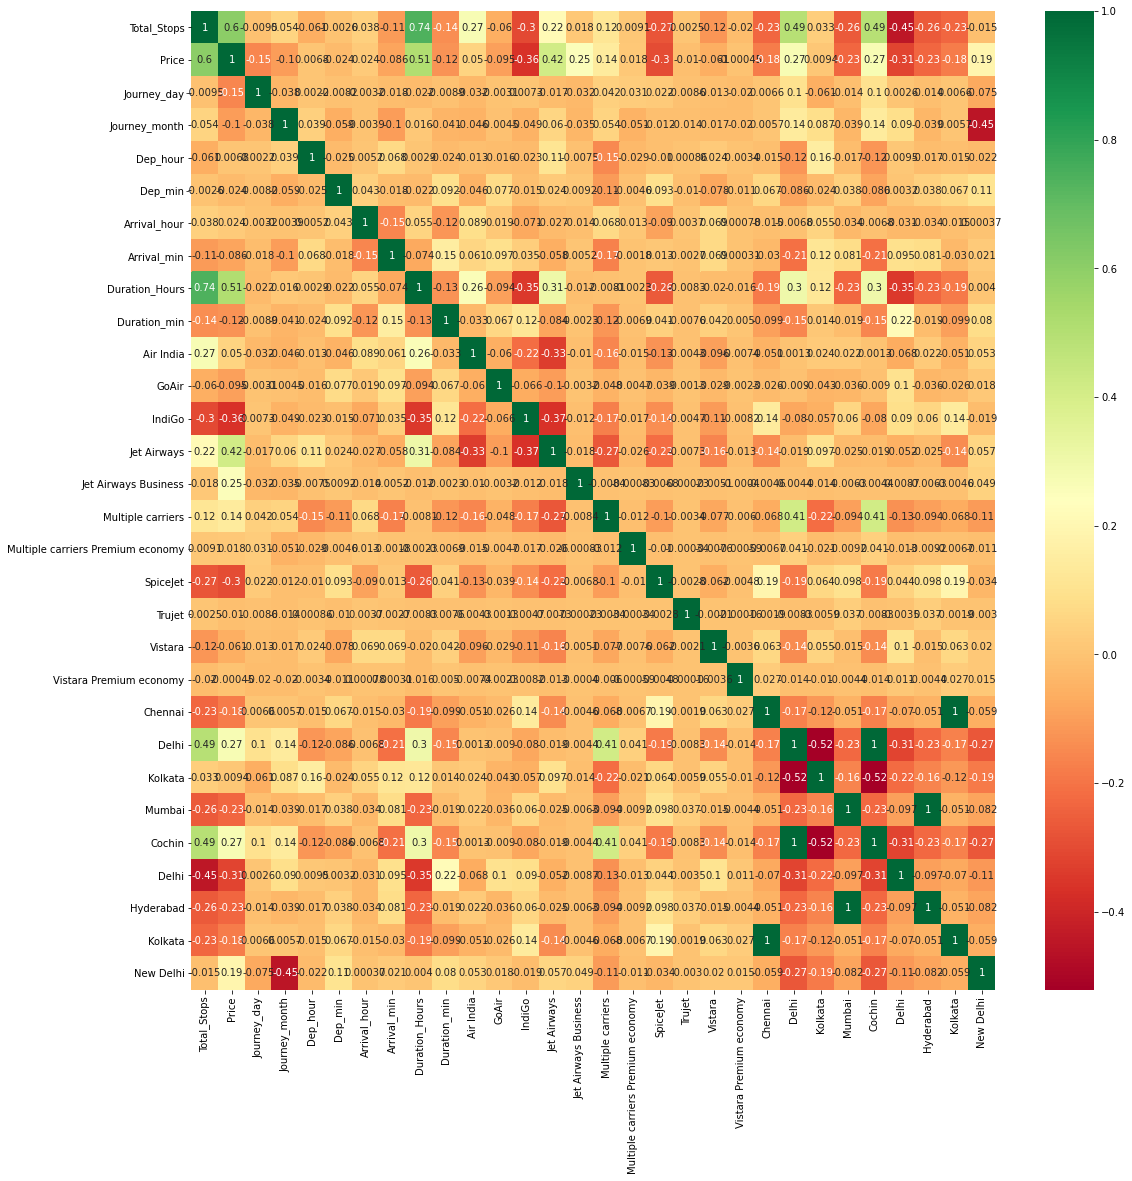

In [71]:
# Finding correlation between Independent and dependent variables

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [72]:
#important features
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

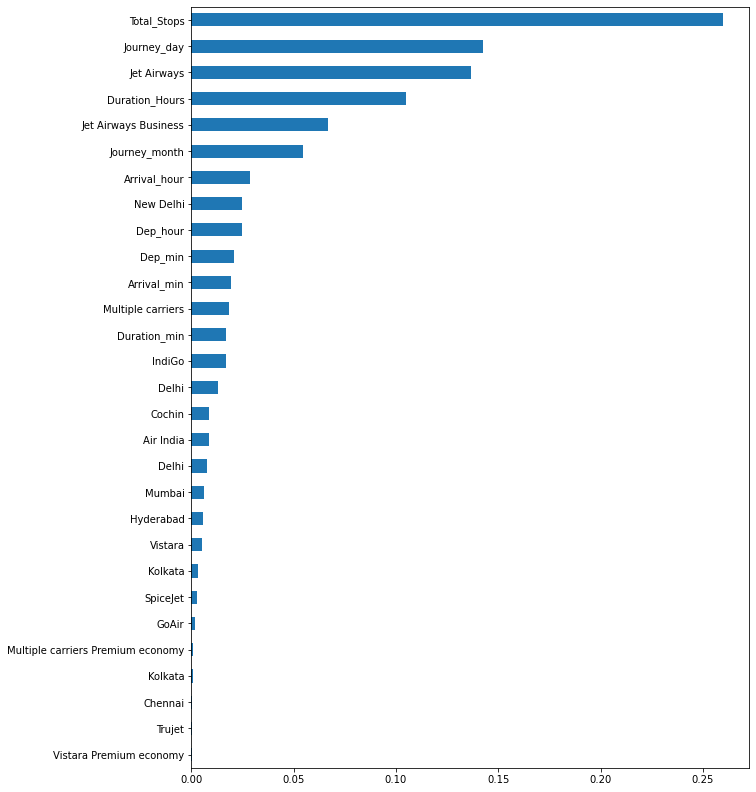

In [74]:
features_imp=pd.Series(selection.feature_importances_,index =train_data.drop(columns=['Price']).columns)
features_imp.sort_values(ascending=True,inplace=True)
features_imp.plot(kind='barh',figsize=(10,14))
plt.show()

## Model Building

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=20,random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
y_pred=model.predict(x_test)

In [78]:
training_score = model.score(x_train,y_train)
training_score

0.9497296793985348

In [79]:
testing_score = model.score(x_test,y_test)
testing_score

0.901744013159691

## Save the model to reuse it again

In [81]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)